<a href="https://colab.research.google.com/github/Kashish-x1/100-days-of-ML/blob/main/Day%2025%20normalization/feature_scaling_normalization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np #linear algebra
import pandas as  pd #data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

In [32]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

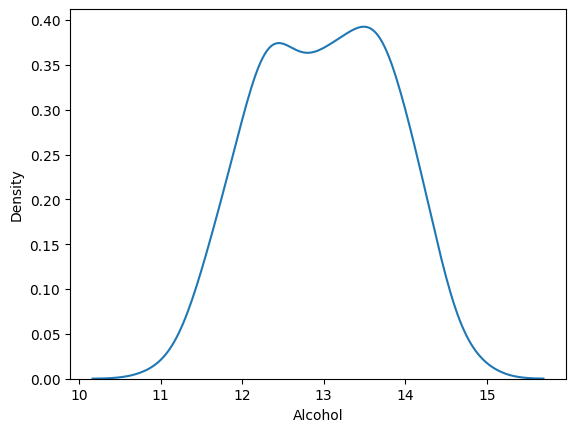

In [5]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic Acid', ylabel='Density'>

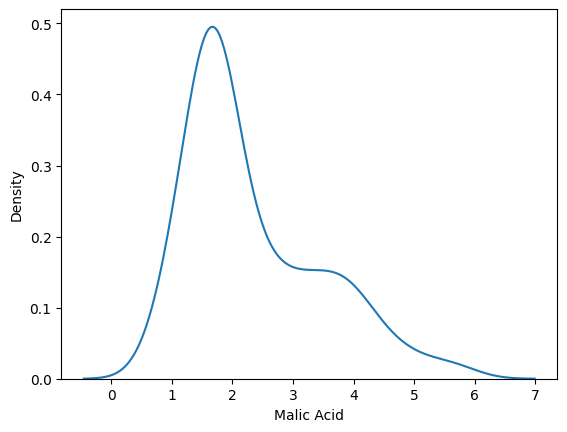

In [6]:
sns.kdeplot(df['Malic Acid'])

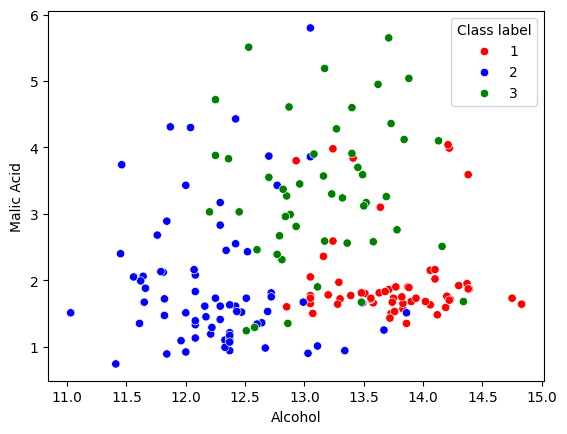

In [10]:
# Ensure 'Class label' is of integer type
df['Class label'] = df['Class label'].astype(int)

# Define color mapping
color_dict = {1: 'red', 2: 'blue', 3: 'green'}

# Create scatter plot
sns.scatterplot(x=df['Alcohol'], y=df['Malic Acid'], hue=df['Class label'], palette=color_dict)

# Show the plot
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(df.drop('Class label',axis = 1),df['Class label'],test_size = 0.3,random_state = 0)
X_train.shape,X_test.shape

((124, 2), (54, 2))

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# fit the scaler to the train set,it will learn the paramteres

scaler.fit(X_train)
# transform train and test sets

X_train_scaled= scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [24]:
np.round(X_train.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [25]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


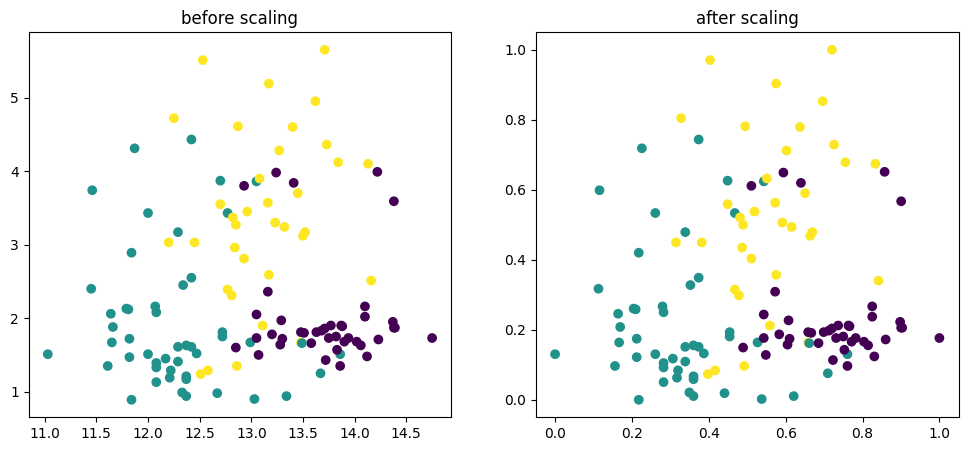

In [26]:
fig,(ax1,ax2) = plt.subplots(ncols = 2 ,figsize=(12,5))
ax1.scatter(X_train['Alcohol'],X_train['Malic Acid'],c =Y_train)
ax1.set_title("before scaling")
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic Acid'],c= Y_train)
ax2.set_title("after scaling")
plt.show()

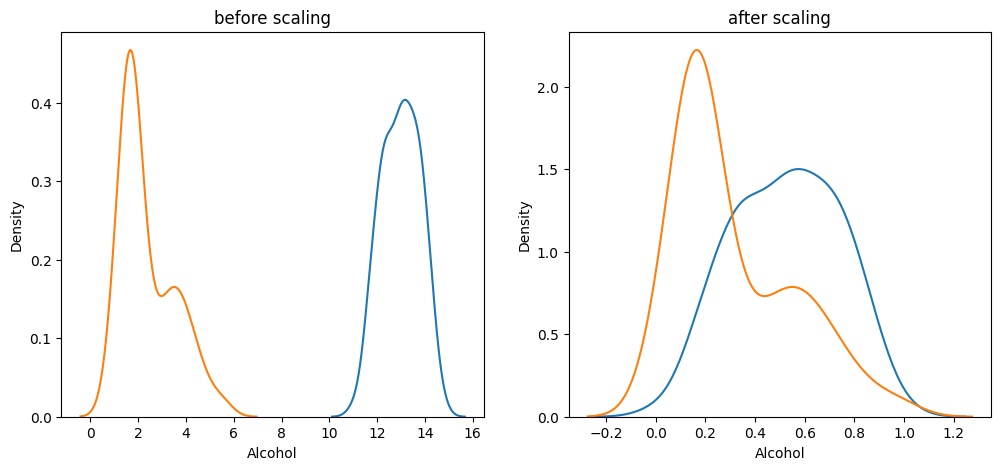

In [27]:
fig,(ax1,ax2) = plt.subplots(ncols = 2 ,figsize=(12,5))
# before scaling
ax1.set_title("before scaling")
sns.kdeplot(X_train['Alcohol'],ax = ax1)
sns.kdeplot(X_train['Malic Acid'],ax = ax1)
# after scaling
ax2.set_title("after scaling")
sns.kdeplot(X_train_scaled['Alcohol'],ax = ax2)
sns.kdeplot(X_train_scaled['Malic Acid'],ax = ax2)
plt.show()

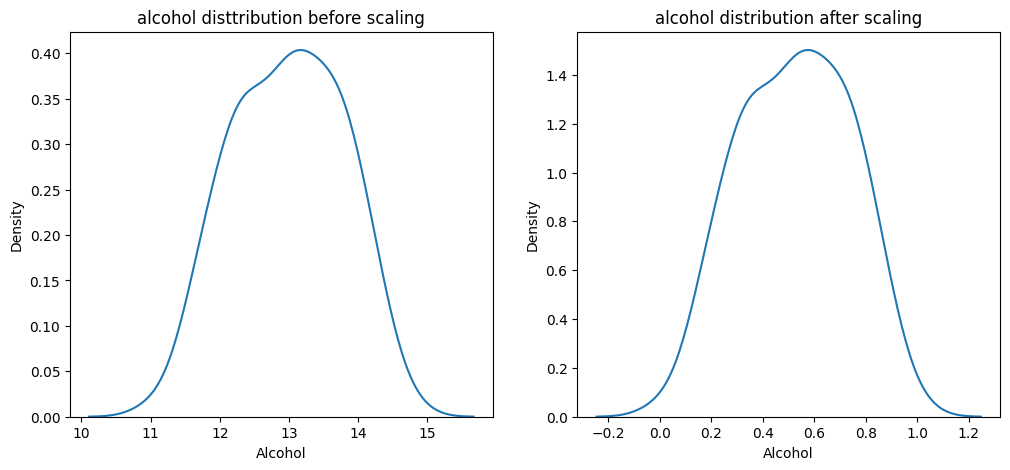

In [28]:
fig,(ax1,ax2) = plt.subplots(ncols = 2 ,figsize=(12,5))
# before scaling
ax1.set_title("alcohol disttribution before scaling")
sns.kdeplot(X_train['Alcohol'],ax = ax1)
# after scaling
ax2.set_title("alcohol distribution after scaling")
sns.kdeplot(X_train_scaled['Alcohol'],ax = ax2)
plt.show()

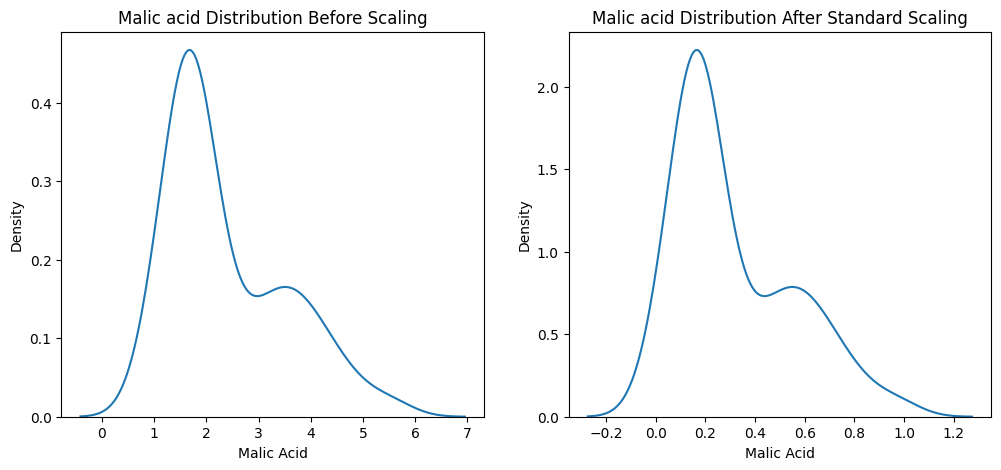

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic Acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic Acid'], ax=ax2)
plt.show()